In [475]:
import shap

import warnings; warnings.simplefilter('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#jobs
#feature ERA5 frame including  2019

In [476]:
def report_scores(y_test, preds, probas):
    print('precision', metrics.precision_score(y_test, preds))
    print('recall', metrics.recall_score(y_test, preds))
    print('auc', metrics.roc_auc_score(y_test, preds))
    print('kappa', metrics.cohen_kappa_score(y_test, preds))
    print('brier score', metrics.brier_score_loss(y_test, probas))

In [477]:
def get_year_train_test_select(dfr, year):
    X_train = dfr[dfr.year != year]
    X_test = dfr[dfr.year == year]
    #poss = dfr[dfr.labels == 1]
    #negs = dfr[dfr.labels == 0].sample(n = poss.shape[0] * 4)
    #X_train = pd.concat([poss, negs])
    return X_train, X_test

In [498]:
def get_year_train_test(dfr, year):
    X_train = dfr.loc[dfr.year != year]
    X_test = dfr.loc[dfr.year == year]
    #poss = dfr[dfr.labels == 1]
    #negs = dfr[dfr.labels == 0].sample(n = poss.shape[0] * 4)
    #X_train = pd.concat([poss, negs])
    return X_train, X_test

In [479]:
def get_year_train_test_(dfr, year):
    X_train = dfr[dfr.year != year]
    X_test = dfr[dfr.year == year]
    X_train = equalize_classes(X_train)
    #X_train = X_train.sample(n = fm.max_fact)
    #if self.max_fact:
    #    X_train_inds = np.random.choice(X_train_inds, size = self.max_fact)
    return X_train, X_test

In [5]:
def equalize_classes(dfr):
    rus = RandomUnderSampler(random_state=0)
    print(dfr.shape, dfr[dfr.labels == 1].shape)
    data_array, labels = rus.fit_resample(dfr, dfr['labels'])
    equalized_dfr = pd.DataFrame(data = data_array, columns = dfr.columns)
    return equalized_dfr

In [480]:
%run svm_model.py

In [522]:
#frp_train = pd.read_parquet('data/feature_train_daily_0.25deg_2019_12_31.parquet')
frp_train = pd.read_parquet('data/feature_train_fr_0.25deg_2019_12_31.parquet')
#frp_train['year'] = frp_train.date.dt.year
#frp_train = pd.read_parquet('data/test_frp.parquet')
#frp_train = frp_train[frp_train.date.dt.year < 2019]
fm = FireMod(frp_train.reset_index(), lc + weather, 'frp', 10, max_fact  = 50000)
dfr = fm.dfr.copy()

In [489]:
tps = [col for col in dfr.columns if 'tp' in col]
t2ms = [col for col in dfr.columns if 't2m' in col]
h2m = [col for col in dfr.columns if 'h2m' in col]
w10 = [col for col in dfr.columns if 'w10' in col]

In [499]:
train, test = get_year_train_test(dfr, year)
test

,index,lonind,latind,frp,year,month,frpD,frpN,duration,fsize,...,w10_51,w10_52,w10_53,w10_54,w10_55,w10_56,w10_57,w10_58,w10_59,labels
324480,0,10,72,0.0,2015,1,0.0,0.0,0.0,0.0,...,1.903313,1.329229,0.576136,1.038432,1.518405,0.772025,1.295612,0.740247,1.725241,0.0
324481,1,10,73,0.0,2015,1,0.0,0.0,0.0,0.0,...,1.556007,1.329229,2.112107,1.218527,1.091084,1.492279,1.383901,2.116185,1.515832,0.0
324482,2,10,74,0.0,2015,1,0.0,0.0,0.0,0.0,...,3.736699,3.237501,4.130275,3.461414,1.782489,3.463889,3.536999,4.583613,2.891216,0.0
324483,3,11,71,0.0,2015,1,0.0,0.0,0.0,0.0,...,0.638148,1.323246,0.369348,1.378291,0.961854,0.325492,1.251609,0.445451,0.754303,0.0
324484,4,11,72,0.0,2015,1,0.0,0.0,0.0,0.0,...,0.812006,0.963070,1.294739,0.183115,1.190980,0.842153,0.180211,0.957545,0.797439,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349435,2075,191,37,0.0,2015,12,0.0,0.0,0.0,0.0,...,2.133605,1.661514,1.319556,1.583148,1.442771,0.688277,2.402412,1.484698,0.814320,0.0
349436,2076,191,38,0.0,2015,12,0.0,0.0,0.0,0.0,...,1.665498,1.345918,3.291236,1.923288,2.343864,0.739155,2.849752,1.898911,0.872991,0.0
349437,2077,191,39,0.0,2015,12,0.0,0.0,0.0,0.0,...,1.853880,1.248320,3.063206,1.570559,2.245630,1.313204,2.214705,1.566865,0.499658,0.0
349438,2078,191,40,0.0,2015,12,0.0,0.0,0.0,0.0,...,1.914704,1.452455,2.820640,1.948128,2.328172,1.356785,1.949232,1.195248,0.613654,0.0


In [531]:
year = 2009
model = 'clfnn1'
feats = lc + weather
#feats = lc + tps + t2ms[:30] + h2m[:30]# + w10
train, test = get_year_train_test(dfr, year)
train = train.sample(n = 100000)
print(test.shape)
x_train = train[feats]
y_train = train['labels'].astype(int)
x_test = test[feats]
y_test = test['labels'].astype(int)

(24960, 74)


In [532]:
train.labels.value_counts()

0.0    95306
1.0     4694
Name: labels, dtype: int64

In [533]:
scaler = preprocessing.StandardScaler().fit(x_train.values)
x_train_scaled = scaler.transform(x_train.values)
x_test_scaled = scaler.transform(x_test.values)
clf = fm.models[model]
clf.fit(x_train_scaled, y_train)
preds = clf.predict(x_test_scaled)
probas = clf.predict_proba(x_test_scaled)

In [530]:
#lc+fwi
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.6669463087248322
recall 0.4812348668280872
auc 0.7321010441914592
kappa 0.5331717612156281
brier score 0.03547057454843109


In [340]:
#test + lc
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.7180327868852459
recall 0.6083333333333333
auc 0.7957682291666667
kappa 0.6367575775273024
brier score 0.030618711350500417


In [534]:
#lc+weather
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.6832684824902724
recall 0.5314769975786925
auc 0.7570075909465456
kappa 0.5731688740590323
brier score 0.03491747562475327


In [526]:
#lc + weather_sub
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.6528169014084507
recall 0.5611380145278451
auc 0.7699932392872622
kappa 0.5776745964183868
brier score 0.03536137174965026


In [506]:
#lc + weather_daily nn1
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.6766874645490641
recall 0.5316399286987522
auc 0.7532737414228046
kappa 0.560704492574654
brier score 0.04713171212357494


In [514]:
#lc + weather_daily nn2
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.5105301379811183
recall 0.425544794188862
auc 0.6983138420918568
kappa 0.4298709751728792
brier score 0.050513287207399477


In [521]:
#lc + weather_daily nn1
probs = probas[:, 1]
prds = np.zeros_like(preds)
prds[probs > 0.5] = 1
report_scores(y_test, prds, probas[:, 1])

precision 0.5290519877675841
recall 0.4188861985472155
auc 0.6962287522682877
kappa 0.43448852650421
brier score 0.04543116863399715


In [430]:
tn, fp, fn, tp  = metrics.confusion_matrix(y_test, prds).ravel()
print(tn, tp, fp, fn)

5113 266 46 105


In [515]:
tn, fp, fn, tp  = metrics.confusion_matrix(y_test, prds).ravel()
print(tn, tp, fp, fn)

22634 703 674 949


In [517]:
list(zip(feats, clf.coefs_[0][:, 1]))

[('loss_last_prim', 0.26682838639935874),
 ('loss_last_sec', 0.4786484650085461),
 ('loss_prim_before', 0.15895872273384024),
 ('loss_sec_before', 0.08511294035688734),
 ('loss_three_prim', 0.20624890402358179),
 ('loss_three_sec', 0.25661981576325066),
 ('frp_acc', 0.2737405254921609),
 ('gain', 0.4633998219237424),
 ('f_prim', -0.5340620509674114),
 ('dem', -0.2506901714885283),
 ('peatd', 0.9183000690816142),
 ('tp_0', -0.06158116383689765),
 ('tp_1', 0.27843942733438554),
 ('tp_2', 0.23785988088249907),
 ('tp_3', 0.16138007072701963),
 ('tp_4', -0.1272464477624572),
 ('tp_5', 0.0002670234080563985),
 ('tp_6', 0.2207467418440946),
 ('tp_7', -0.01891284154970526),
 ('tp_8', 0.04228778502286258),
 ('tp_9', 0.326690486525529),
 ('tp_10', -0.06591082771442058),
 ('tp_11', -0.2427074762255766),
 ('tp_12', 0.13687653450412626),
 ('tp_13', 0.09435515182876829),
 ('tp_14', 0.030875212309923666),
 ('tp_15', 0.17043342191235417),
 ('tp_16', 0.2045906361316821),
 ('tp_17', 0.05540411529896688),
 ('tp_18', 0.011041055259268216),
 ('tp_19', 0.03994986700236139),
 ('tp_20', -0.12491168262776359),
 ('tp_21', 0.0713873652267675),
 ('tp_22', -0.06977172419683182),
 ('tp_23', -0.04934504838283423),
 ('tp_24', 0.10820926093022543),
 ('tp_25', 0.18986927012497748),
 ('tp_26', 0.13701768181946275),
 ('tp_27', 0.16400560578113083),
 ('tp_28', 0.013645087344216137),
 ('tp_29', 0.1286355672460866),
 ('tp_30', -0.10026305558474963),
 ('tp_31', 0.3658814363226284),
 ('tp_32', 0.26590285246191947),
 ('tp_33', 0.3725655666796009),
 ('tp_34', 0.36103216019293666),
 ('tp_35', 0.3126085997764948),
 ('tp_36', 0.0798967932022576),
 ('tp_37', -0.07349555565653108),
 ('tp_38', 0.16374894095200201),
 ('tp_39', -0.17783350376054213),
 ('tp_40', -0.0776606722636194),
 ('tp_41', 0.1596531690909576),
 ('tp_42', 0.07328325614930167),
 ('tp_43', -0.012478464663445763),
 ('tp_44', 0.08348908542070993),
 ('tp_45', 0.21301698884493486),
 ('tp_46', 0.045118241205275945),
 ('tp_47', -0.05736759646648003),
 ('tp_48', -0.23598404035693482),
 ('tp_49', -0.1502537286767549),
 ('tp_50', 0.10073574903754967),
 ('tp_51', -0.2997147901426486),
 ('tp_52', -0.17000063991040282),
 ('tp_53', -0.10470113313804696),
 ('tp_54', -0.07814052971510657),
 ('tp_55', 0.0413338077319175),
 ('tp_56', 0.03513060281594596),
 ('tp_57', -0.21622034464741902),
 ('tp_58', -0.20285285201976905),
 ('tp_59', -0.2122011828066246),
 ('t2m_0', -0.018607810004456864),
 ('t2m_1', -0.1940622836969101),
 ('t2m_2', -0.21609035371902482),
 ('t2m_3', -0.25167950730086386),
 ('t2m_4', 0.006533357920385847),
 ('t2m_5', -0.030149527715015598),
 ('t2m_6', 0.0566267520982502),
 ('t2m_7', 0.14456013132588208),
 ('t2m_8', 0.2290970737373298),
 ('t2m_9', 0.051027929791727),
 ('t2m_10', 0.24793226938203106),
 ('t2m_11', 0.01693368530026338),
 ('t2m_12', -0.023078950082656126),
 ('t2m_13', -0.027058718052144156),
 ('t2m_14', 0.025781606751288367),
 ('t2m_15', 0.013562174144799152),
 ('t2m_16', 0.08799785492564981),
 ('t2m_17', -0.0680796301883521),
 ('t2m_18', -0.03242234413520291),
 ('t2m_19', 0.27584040451684966),
 ('t2m_20', 0.15627610610225806),
 ('t2m_21', 0.1890704411753266),
 ('t2m_22', -0.005415227229251799),
 ('t2m_23', 0.06884290330899014),
 ('t2m_24', 0.04073431010065535),
 ('t2m_25', 0.08532891949832237),
 ('t2m_26', 0.014295181630028585),
 ('t2m_27', -0.03020653901017733),
 ('t2m_28', -0.03149807903103797),
 ('t2m_29', 0.39171157114566707),
 ('h2m_0', 0.23743782119795642),
 ('h2m_1', 0.277020054002132),
 ('h2m_2', 0.6063361702704478),
 ('h2m_3', 0.4384058564598877),
 ('h2m_4', 0.02938615771437775),
 ('h2m_5', 0.10402521724380455),
 ('h2m_6', 0.14599281132069117),
 ('h2m_7', 0.1985529780544594),
 ('h2m_8', 0.16228319853115905),
 ('h2m_9', 0.06836620609070007),
 ('h2m_10', -0.2395117679509156),
 ('h2m_11', 0.08164865819626718),
 ('h2m_12', 0.200271579934143),
 ('h2m_13', 0.01258988163226244),
 ('h2m_14', -0.06720491673021763),
 ('h2m_15', 0.2757348015773369),
 ('h2m_16', 0.034285740813078294),
 ('h2m_17', 0.24

In [465]:
clf.coefs_[0][:,0]

array([-0.24842555, -0.98559279,  0.65556923, -0.05084682,  0.50381357,
       -0.64564726, -0.45441663, -0.37057925,  0.95612698, -0.0933365 ,
        0.0983542 , -0.15435933,  0.41672659,  0.05477724,  0.23252354,
        0.05166063,  0.22768672,  0.10842405, -0.06829474,  0.53755459,
        0.09068332, -0.36503892,  0.50394908, -0.02231107,  0.30521971,
       -0.3933226 ,  0.17574386,  0.46902783, -0.15870884,  0.18794142,
       -0.12718878, -0.41012291,  0.20034496, -0.3260682 , -0.07911707,
        0.04435436, -0.10824784,  0.17320946, -0.11428286,  0.34601911,
        0.05373894, -0.14849595, -0.35265833, -0.31798155, -0.18343351,
       -0.06559568, -0.23642512, -0.22597449,  0.58635174,  0.17385411,
       -0.41189635, -0.00459478,  0.08657886,  0.46976684, -0.06045531,
        0.11267028, -0.40390081,  0.39380059, -0.1063549 , -0.05053204,
        0.15994318, -0.49098219, -0.06738078, -0.3248689 ,  0.00675718,
        0.40178163, -0.00990289, -0.17648184, -0.35733062,  0.44

In [536]:
#def reliability_curve(y_true, y_score):
bins = np.linspace(0, 1, 21)
centres = (bins + (bins[1] - bins[0]))[:-1]
df = pd.DataFrame({'label': y_test, 'prob': probs})
df['bined'] = pd.cut(df.prob, bins)


In [537]:
(bins + 0.025)[:-1]

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

[<matplotlib.lines.Line2D at 0x7f00aef425d0>]

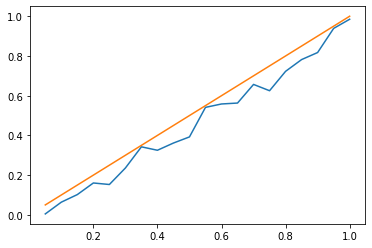

In [538]:
gr = df.groupby(['bined'])['label'].agg(count = 'count', suma = 'sum')
vals = (gr['suma'] / gr['count']).values
plt.plot(centres, vals)
plt.plot(centres, centres)

In [323]:
print(clf.predict_proba(yy))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 24)

In [324]:
gr

,count,suma
bined,,
"(0.0, 0.05]",15337,146
"(0.05, 0.1]",4659,518
"(0.1, 0.15]",3130,536
"(0.15, 0.2]",1192,237
"(0.2, 0.25]",410,116
"(0.25, 0.3]",137,46
"(0.3, 0.35]",62,30
"(0.35, 0.4]",21,11
"(0.4, 0.45]",0,0


In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_test_scaled)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [ ]:
reliability_scores = {}
y_score = {}
for method, clf in classifiers.items():
    clf.fit(X_train, y_train)
    """
    if method == "SVC + IR":  # Calibrate SVC scores using isotonic regression.
        n_plus = (y_calibration == 1.0).sum()  # number of positive examples
        n_minus = (y_calibration == 0.0).sum()  # number of negative examples
        # Determine target values for isotonic calibration. See 
        # "Predicting Good Probabilities with Supervised Learning"
        # for details.
        y_target = np.where(y_calibration == 0.0, 
                            1.0 / (n_minus + 2.0),
                            (n_plus + 1.0) / (n_plus + 2.0))
        # Perform actual calibration using isotonic calibration
        svm_score = clf.decision_function(X_calibration)[:, 0]
        ir = IsotonicRegression(out_of_bounds='clip').fit(svm_score, y_target)
        y_score[method] = ir.transform(clf.decision_function(X_test)[:, 0])
        reliability_scores[method] = \
            reliability_curve(y_test, y_score[method], bins=bins, normalize=False)
    elif method == "SVC":
        # Use SVC scores (predict_proba returns already calibrated probabilities)
        y_score[method] = clf.decision_function(X_test)[:, 0]
        reliability_scores[method] = \
            reliability_curve(y_test, y_score[method], bins=bins, normalize=True)
    else:
    """
    y_score[method] = clf.predict_proba(X_test)[:, 1]
    reliability_scores[method] = reliability_curve(y_test, y_score[method], bins=bins, normalize=False)

In [ ]:
plt.figure(0, figsize=(8, 8))
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0], 'k', label="Perfect")
for method, (y_score_bin_mean, empirical_prob_pos) in reliability_scores.items():
    scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
    plt.plot(y_score_bin_mean[scores_not_nan],
             empirical_prob_pos[scores_not_nan], label=method)
plt.ylabel("Empirical probability")
plt.legend(loc=0)

plt.subplot2grid((3, 1), (2, 0))
for method, y_score_ in y_score.items():
    y_score_ = (y_score_ - y_score_.min()) / (y_score_.max() - y_score_.min())
    plt.hist(y_score_, range=(0, 1), bins=bins, label=method,
             histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend(loc='upper center', ncol=2)

In [59]:
import lime
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_scaled, feature_names=x_train.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(x_test_scaled[19], clf.predict_proba, num_features=12, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)

ModuleNotFoundError: No module named 'lime'

In [10]:
fm.plot_forecast(weather + lc,'clfnn1', frp_clim, frp_s5, [7, 8, 9, 10], 'updated_2019_07')

NameError: name 'frp_clim' is not defined

IndexError: list index out of range

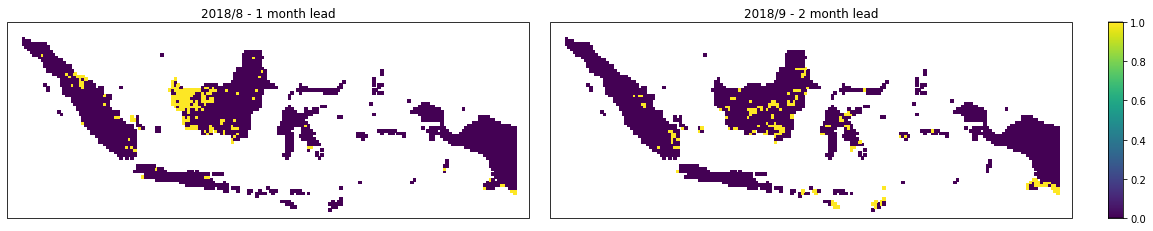

In [10]:
fm.plot_features(['labels'], dfr[dfr.year == 2018], [8,9])

np.where((preds == 1)&(y_test == 0))

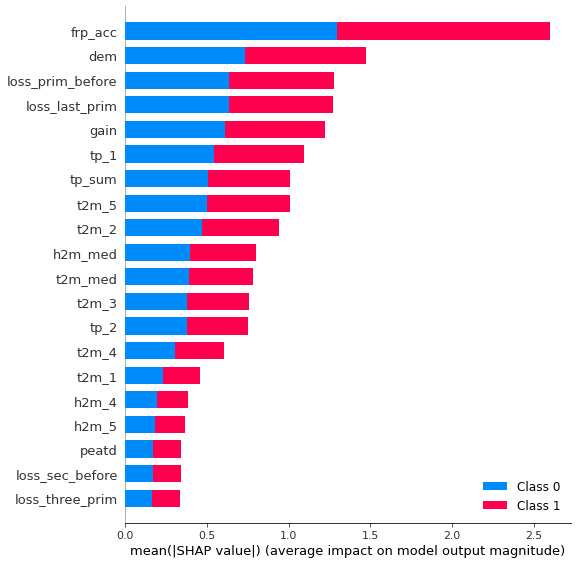

In [341]:
shap.initjs()
XX = pd.DataFrame(data = x_train_scaled, columns = feats).sample(n = 10)
yy = pd.DataFrame(data = x_test_scaled, columns = feats).sample(n = 10)
explainer = shap.KernelExplainer(clf.predict_proba, XX, columns = feats, link = 'logit')
shap_values = explainer.shap_values(XX)
#shap.force_plot(explainer.expected_value[0], shap_values[0], yy, link='logit')
shap.summary_plot(shap_values, yy)

In [24]:
XX = pd.DataFrame(data = x_train_scaled, columns = feats).sample(n = 10)
yy = pd.DataFrame(data = x_test_scaled, columns = feats).sample(n = 10)
explainer = shap.KernelExplainer(clf.predict_proba, XX)
shap_values = explainer.shap_values(XX)
shap.force_plot(explainer.expected_value[0], shap_values[0],yy)



In [408]:
fm.get_scores_(dfr, weather+lc, 'clfnn1')

KeyError: "['peatd'] not in index"

In [43]:
#clfnn1
tn, fp, fn, tp  = metrics.confusion_matrix(y_test, prds).ravel()
print(tn, tp, fp, fn)

19727 725 4458 50


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.21')

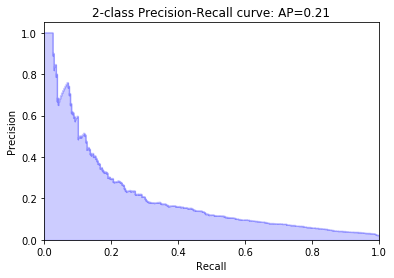

In [409]:
precision, recall, _ = metrics.precision_recall_curve(y_test, probs)
average_precision = metrics.average_precision_score(y_test, probs)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = {'step': 'post'}
              
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
#plt.savefig('prec_recall')

## traind = pd.DataFrame(data = x_train_scaled.copy(), columns = x_train.columns)
traind['labels'] = y_train
traind.boxplot('tp_sum', by  = 'labels')

In [86]:
x_train['tp_sum'].mean()

209.864

In [29]:
fm.get_scores_(fm.dfr, feats, 'clfnn1')e

fit_time 2.2418027485118195
score_time 0.09980243795058306
test_AUC 0.6588477780816007
test_bal_acc 0.5247761447136852
test_acc 0.9465269313081426
test_precision 0.2605513681231814
test_recall 0.05751507242012991
test_kappa 0.07257828393567643


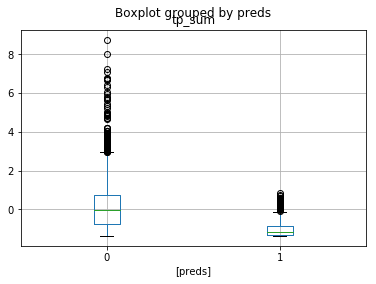

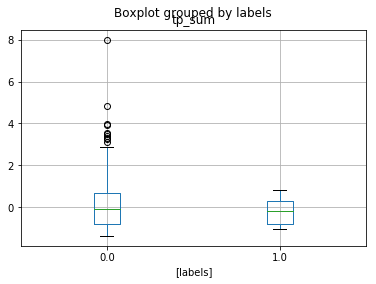

In [22]:
testd = pd.DataFrame(data = x_test_scaled.copy(), columns = x_test.columns)
testd['labels'] = y_test
testd['preds'] = preds
testd.boxplot('tp_sum', by  = ['preds'])
testd.boxplot('tp_sum', by = ['labels'])

In [79]:
x_train[y_train == 1]['tp_sum'].mean()

186.17241

In [496]:
print(list(zip(feats,clf.feature_importances_)))

[('loss_last_prim', 0.008531103298238928), ('loss_last_sec', 0.030157858404714903), ('loss_prim_before', 0.004682163075278482), ('loss_sec_before', 0.011945324230770509), ('loss_three_prim', 0.009455543738004108), ('loss_three_sec', 0.03959295577353595), ('frp_acc', 0.17893311828590114), ('gain', 0.09685076590056525), ('f_prim', 0.09467750940891284), ('dem', 0.0), ('tp_sum', 0.13183907359130462), ('tp_1', 0.15630971474495453), ('tp_2', 0.03248099060408173), ('tp_3', 0.0), ('tp_4', 0.0), ('tp_5', 0.000270417270500316), ('t2m_med', 0.006323244473676359), ('h2m_med', 0.03229458301515344), ('h2m_75p', 0.06506665280486847), ('t2m_7mm', 0.0021774245204093457), ('h2m_7mm', 0.05561542274462699), ('t2m_3sum', 0.002399199468632014), ('h2m_3sum', 0.0403969346458701)]
